<a href="https://colab.research.google.com/github/DREAMCHASER04/Machine-Learning/blob/main/codeathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

In this project, the main task I'm focusing on using the regression to model the housing price. The thing we are expecting from this model should be the prediciton of the housing price in Aimes by using model to keep learning and verifying through the past housing price in order to reduce the error in the prediction. Respects to performance measure, I have utilized different kinds of visualization of the data, regarding as the scatter plot, or the matrix to find the overall performance of the data.
Sufficient data is available to be collected. The learning algorithm I have utilized to evaluate are Linear Regression, Decision Tree Regressor, and Random Forest Regressor.



In [ ]:
import sklearn # general ml package

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  """Save the selected figure into disc under an image extention and resolution

  Parameters
  ----------
  fig_id : figure handle
    The id number of the figure
  tight_layout : boolean (True or False)
    Specifies whenther the layout should be tight or not
  fig_extension: string
    Under what extension should the file be saved ("png" or "jpg")
  resolution: int
    the quality of the figure (ie. 100,200,300)

  Returns
  -------
  void
    Does not return any value
  """

  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [ ]:
import pandas as pd
housing_data = pd.read_csv('/content/train.csv')
housing = housing_data
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
#Getting the general info for the dataset#
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Getting the general pattern of the dataset#
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

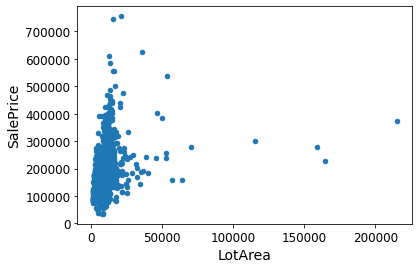

In [ ]:
# Your code to visualize the data here
#make sure of doing a plot of finding the relationship between the LotArea and the Sale Price
housing.plot(kind="scatter",x="LotArea",y="SalePrice")

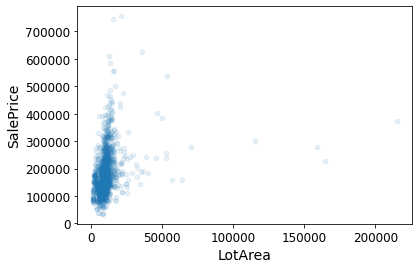

In [ ]:
#increase the transparency of the graph
housing.plot(kind="scatter",x="LotArea",y="SalePrice",alpha=0.1)

In [ ]:
#making a correlation matrix
corr_matrix = housing.corr()
corr_matrix.shape

(38, 38)

In [ ]:
#Correlates all the other values with housing price
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c419fdd0>,
      dtype=object)

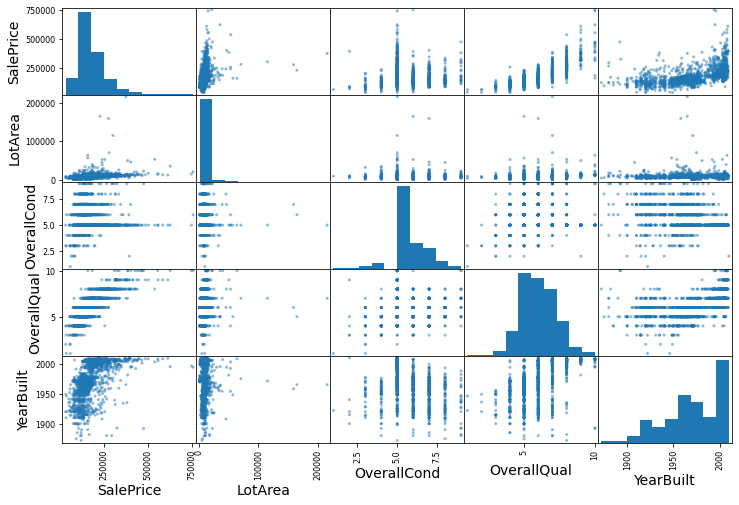

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['SalePrice','LotArea','OverallCond','OverallQual','YearBuilt']
scatter_matrix(housing[attributes], figsize=(12, 8))


##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [ ]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here
#Split the data into training, validation, and testing parts#
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
trv_set, test_set = train_test_split(housing, test_size=0.2)
train_set, validation_set = train_test_split(trv_set, test_size=0.3)
housing = train_set.drop("SalePrice", axis=1) # drop labels for training set
housing_labels = train_set["SalePrice"].copy()
housing_labels

721     143000
1364    144152
633     139400
661     402000
1305    325000
         ...  
931     117500
1115    318000
900     110000
957     132000
797     110000
Name: SalePrice, Length: 817, dtype: int64

In [ ]:
# Check to see if there's any missing value in the data with .isnull()
sample_incomplete_rows = train_set[train_set.isnull().any(axis=1)].head()
sample_incomplete_rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
721,722,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,143000
1364,1365,160,FV,30.0,3180,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,144152
633,634,20,RL,80.0,9250,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,139400
661,662,60,RL,52.0,46589,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,402000
1305,1306,20,RL,108.0,13173,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,325000


In [ ]:
# One option for dealing with missing data is just removing examples which contains the missing data
# with .dropna() only the examples with missing values are dropped
housing_dropped = housing.drop(['MSZoning','LotFrontage','Electrical','GarageYrBlt','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition'],axis=1)

In [ ]:
# Scikit-Learn has a handy class to take care of this: the SimpleImputer class.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing_dropped)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([7.350e+02, 5.000e+01, 9.600e+03, 6.000e+00, 5.000e+00, 1.974e+03,
       1.995e+03, 4.080e+02, 0.000e+00, 4.840e+02, 9.990e+02, 1.097e+03,
       0.000e+00, 0.000e+00, 1.486e+03, 0.000e+00, 0.000e+00, 2.000e+00,
       0.000e+00, 3.000e+00, 1.000e+00, 6.000e+00, 1.000e+00, 2.000e+00,
       4.840e+02, 0.000e+00, 2.800e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 6.000e+00, 2.008e+03])

In [ ]:
housing_dropped.median().values

array([7.350e+02, 5.000e+01, 9.600e+03, 6.000e+00, 5.000e+00, 1.974e+03,
       1.995e+03, 4.080e+02, 0.000e+00, 4.840e+02, 9.990e+02, 1.097e+03,
       0.000e+00, 0.000e+00, 1.486e+03, 0.000e+00, 0.000e+00, 2.000e+00,
       0.000e+00, 3.000e+00, 1.000e+00, 6.000e+00, 1.000e+00, 2.000e+00,
       4.840e+02, 0.000e+00, 2.800e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 6.000e+00, 2.008e+03])

In [ ]:
X = imputer.transform(housing_dropped)
print(X)

[[7.220e+02 1.200e+02 4.426e+03 ... 0.000e+00 5.000e+00 2.010e+03]
 [1.365e+03 1.600e+02 3.180e+03 ... 0.000e+00 4.000e+00 2.006e+03]
 [6.340e+02 2.000e+01 9.250e+03 ... 0.000e+00 7.000e+00 2.007e+03]
 ...
 [9.010e+02 2.000e+01 7.340e+03 ... 0.000e+00 6.000e+00 2.007e+03]
 [9.580e+02 2.000e+01 7.420e+03 ... 0.000e+00 4.000e+00 2.007e+03]
 [7.980e+02 2.000e+01 7.677e+03 ... 0.000e+00 4.000e+00 2.008e+03]]


In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_dropped.columns,
                          index=housing.index)

In [ ]:
housing_tr.loc[housing_dropped.index.values]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
721,722.0,120.0,4426.0,6.0,5.0,2004.0,2004.0,662.0,0.0,186.0,...,420.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0
1364,1365.0,160.0,3180.0,7.0,5.0,2005.0,2005.0,0.0,0.0,600.0,...,480.0,0.0,166.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
633,634.0,20.0,9250.0,5.0,7.0,1954.0,2005.0,480.0,468.0,108.0,...,260.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0
661,662.0,60.0,46589.0,8.0,7.0,1994.0,2005.0,1361.0,180.0,88.0,...,711.0,517.0,76.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0
1305,1306.0,20.0,13173.0,9.0,5.0,2006.0,2007.0,1572.0,0.0,80.0,...,840.0,404.0,102.0,0.0,0.0,0.0,0.0,0.0,11.0,2009.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,932.0,20.0,9100.0,5.0,6.0,1965.0,1965.0,338.0,466.0,121.0,...,429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0
1115,1116.0,20.0,12085.0,8.0,5.0,2007.0,2007.0,1004.0,0.0,730.0,...,928.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2007.0
900,901.0,20.0,7340.0,4.0,6.0,1971.0,1971.0,322.0,0.0,536.0,...,684.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0
957,958.0,20.0,7420.0,5.0,5.0,1962.0,1962.0,417.0,0.0,640.0,...,576.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0


In [ ]:
imputer.strategy

'median'

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_dropped.columns,
                          index=housing_dropped.Id)
housing_tr.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
722,722.0,120.0,4426.0,6.0,5.0,2004.0,2004.0,662.0,0.0,186.0,...,420.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2010.0
1365,1365.0,160.0,3180.0,7.0,5.0,2005.0,2005.0,0.0,0.0,600.0,...,480.0,0.0,166.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
634,634.0,20.0,9250.0,5.0,7.0,1954.0,2005.0,480.0,468.0,108.0,...,260.0,390.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0
662,662.0,60.0,46589.0,8.0,7.0,1994.0,2005.0,1361.0,180.0,88.0,...,711.0,517.0,76.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0
1306,1306.0,20.0,13173.0,9.0,5.0,2006.0,2007.0,1572.0,0.0,80.0,...,840.0,404.0,102.0,0.0,0.0,0.0,0.0,0.0,11.0,2009.0


In [ ]:
housing_cate = train_set[['MSZoning','LotFrontage','Electrical','GarageYrBlt','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']]
housing_cate.head(10)

,MSZoning,LotFrontage,Electrical,GarageYrBlt,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
721,RM,NaN,SBrkr,2004.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1364,FV,30.0,SBrkr,2005.0,Pave,Pave,Reg,Lvl,AllPub,Inside,...,Detchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
633,RL,80.0,SBrkr,1954.0,Pave,NaN,Reg,Lvl,AllPub,Corner,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
661,RL,52.0,SBrkr,1994.0,Pave,NaN,IR2,Lvl,AllPub,CulDSac,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1305,RL,108.0,SBrkr,2006.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
729,RM,52.0,FuseA,1962.0,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
901,RL,64.0,SBrkr,1968.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1250,RL,93.0,SBrkr,1968.0,Pave,NaN,Reg,Lvl,AllPub,Corner,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1103,RL,79.0,SBrkr,1954.0,Pave,NaN,Reg,Lvl,AllPub,Corner,...,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
103,RL,94.0,SBrkr,2009.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# OrdinalEncoder encodes consecutive numbers for the categories (5 categories --> 0,1,2,3,4)
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cate)
housing_cat_encoded[:10]

array([[  4.,  nan,   3.,  85.,   1.,  nan,   3.,   3.,   0.,   4.,   0.,
          5.,   2.,   2.,   4.,   2.,   1.,   0.,  10.,  12.,   1.,  83.,
          2.,   4.,   2.,   2.,   3.,   0.,   2.,   5.,   1.,   0.,   1.,
          2.,   5.,  nan,   1.,   1.,   4.,   4.,   2.,  nan,  nan,  nan,
          8.,   4.],
       [  1.,   2.,   3.,  86.,   1.,   1.,   3.,   3.,   0.,   4.,   0.,
         21.,   2.,   2.,   4.,   5.,   1.,   0.,   7.,   8.,   2.,   0.,
          2.,   4.,   2.,   2.,   3.,   3.,   5.,   5.,   1.,   0.,   1.,
          2.,   5.,  nan,   5.,   1.,   4.,   4.,   2.,  nan,  nan,  nan,
          8.,   0.],
       [  3.,  50.,   3.,  35.,   1.,  nan,   3.,   3.,   0.,   0.,   0.,
         12.,   2.,   2.,   0.,   2.,   1.,   0.,  11.,  13.,   2.,   0.,
          3.,   4.,   1.,   3.,   3.,   3.,   1.,   3.,   1.,   4.,   1.,
          3.,   5.,  nan,   1.,   2.,   4.,   4.,   2.,  nan,  nan,  nan,
          8.,   4.],
       [  3.,  22.,   3.,  75.,   1.,  nan,   1.,

In [ ]:
ordinal_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array([ 21.,  24.,  30.,  32.,  33.,  34.,  35.,  36.,  37.,  39.,  40.,
         41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,
         52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,
         63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,
         74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
         85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106.,
        107., 108., 109., 110., 111., 112., 114., 115., 118., 120., 121.,
        122., 124., 128., 130., 134., 144., 150., 152., 174., 182.,  nan]),
 array(['FuseA', 'FuseF', 'FuseP', 'SBrkr', nan], dtype=object),
 array([1906., 1908., 1910., 1914., 1915., 1916., 1918., 1920., 1921.,
        1922., 1923., 1924., 1925., 1926., 1929., 1930., 1931., 1932.,
        1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 19

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(handle_unknown = "ignore")
housing_cat_1hot = cat_encoder.fit_transform(housing_cate)
housing_cat_1hot

<817x684 sparse matrix of type '<class 'numpy.float64'>'
	with 37582 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
cat_encoder = OneHotEncoder(sparse=False,handle_unknown = "ignore")
housing_cat_1hot = cat_encoder.fit_transform(housing_cate)
housing_cat_1hot

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array([ 21.,  24.,  30.,  32.,  33.,  34.,  35.,  36.,  37.,  39.,  40.,
         41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,
         52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,
         63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,
         74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,
         85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,
         96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106.,
        107., 108., 109., 110., 111., 112., 114., 115., 118., 120., 121.,
        122., 124., 128., 130., 134., 144., 150., 152., 174., 182.,  nan]),
 array(['FuseA', 'FuseF', 'FuseP', 'SBrkr', nan], dtype=object),
 array([1906., 1908., 1910., 1914., 1915., 1916., 1918., 1920., 1921.,
        1922., 1923., 1924., 1925., 1926., 1929., 1930., 1931., 1932.,
        1934., 1935., 1936., 1937., 1938., 1939., 1940., 1941., 19

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_dropped)

In [ ]:
housing_num_tr

array([[-0.02596512,  1.49999573, -0.59759112, ..., -0.09084582,
        -0.49821749,  1.63273337],
       [ 1.48375072,  2.45844446, -0.71731082, ..., -0.09084582,
        -0.87233852, -1.40586154],
       [-0.23258253, -0.8961261 , -0.13408562, ..., -0.09084582,
         0.25002459, -0.64621281],
       ...,
       [ 0.39431347, -0.8961261 , -0.31760459, ..., -0.09084582,
        -0.12409645, -0.64621281],
       [ 0.5281452 , -0.8961261 , -0.30991793, ..., -0.09084582,
        -0.87233852, -0.64621281],
       [ 0.15247719, -0.8961261 , -0.28522454, ..., -0.09084582,
        -0.87233852,  0.11343592]])

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_dropped)
cat_attribs = ['MSZoning','LotFrontage','Electrical','GarageYrBlt','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
# housing_prepared
print(housing.shape)
print(housing_prepared.shape)
housing_prepared

(817, 80)
(817, 718)


<817x718 sparse matrix of type '<class 'numpy.float64'>'
	with 65360 stored elements in Compressed Sparse Row format>

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [ ]:
# Try a few models here
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression()

In [ ]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [143000.01786783 146698.54480845 131361.16401664 401999.69123852
 324999.90225679]


In [ ]:
print("Labels:", list(some_labels))

Labels: [143000, 144152, 139400, 402000, 325000]


In [ ]:
some_data_prepared

<5x718 sparse matrix of type '<class 'numpy.float64'>'
	with 400 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6766.837240156639

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

4477.378527445483

In [ ]:
#Train a decision tree regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [52135.73617526 40446.08804744 46086.95891451 54290.74657242
 35288.35610938 36169.64652669 36042.70599225 66167.88145391
 44358.88054032 39413.22483916]
Mean: 45040.02251713438
Standard deviation: 9441.22269592073


In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [42561.63260753 43841.14474014 50695.76861515 54329.5896317
 39021.21133474 51852.12046477 44483.56672421 63901.89645954
 45907.24592814 45734.05953316]
Mean: 48232.82360390851
Standard deviation: 6810.784975044736


In [ ]:
# train with Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [ ]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

11530.668152723489

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [39146.92056085 25390.18463607 29265.02201708 36620.22601246
 24738.38511259 30253.22311519 27405.71688959 47934.97514906
 23301.19502345 18468.16010674]
Mean: 30252.40086230878
Standard deviation: 8262.243930290131


In [ ]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     48232.823604
std       7179.197725
min      39021.211335
25%      44001.750236
50%      45820.652731
75%      51563.032502
max      63901.896460
dtype: float64

## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# find the best combination
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [ ]:
cvres = grid_search.cv_results_
# zip() is to combine the column "mean_test_score" with struct "params"
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

51038.07706827125 {'max_features': 2, 'n_estimators': 3}
43083.9989000279 {'max_features': 2, 'n_estimators': 10}
40576.99506482523 {'max_features': 2, 'n_estimators': 30}
50501.08538723343 {'max_features': 4, 'n_estimators': 3}
40936.21716595089 {'max_features': 4, 'n_estimators': 10}
40348.53494233771 {'max_features': 4, 'n_estimators': 30}
48124.56031232904 {'max_features': 6, 'n_estimators': 3}
39634.87757462144 {'max_features': 6, 'n_estimators': 10}
38010.60313697622 {'max_features': 6, 'n_estimators': 30}
50022.43759319974 {'max_features': 8, 'n_estimators': 3}
40676.142500605674 {'max_features': 8, 'n_estimators': 10}
38172.829685208984 {'max_features': 8, 'n_estimators': 30}
52403.13818331693 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
43265.86757585766 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
50099.28176224523 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
41439.70551950476 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [ ]:
# View the research results in table format
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007794,0.001090,0.000834,0.000033,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.365312e+09,-3.290628e+09,...,-2.604885e+09,6.483289e+08,16,-7.514706e+08,-6.689578e+08,-7.080625e+08,-7.628588e+08,-7.518250e+08,-7.286349e+08,3.525649e+07
1,0.021009,0.000605,0.001551,0.000099,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.310110e+09,-2.637314e+09,...,-1.856231e+09,5.722387e+08,10,-3.839623e+08,-3.099998e+08,-3.044376e+08,-3.635731e+08,-3.938495e+08,-3.511645e+08,3.722800e+07
2,0.062566,0.002982,0.003701,0.000202,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.061467e+09,-2.443416e+09,...,-1.646493e+09,5.686504e+08,5,-2.673331e+08,-2.263278e+08,-2.440066e+08,-2.537542e+08,-2.981148e+08,-2.579073e+08,2.413807e+07
3,0.007669,0.000244,0.000835,0.000015,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.796328e+09,-2.947023e+09,...,-2.550360e+09,7.471415e+08,15,-7.854101e+08,-5.328839e+08,-6.857555e+08,-8.219541e+08,-7.926319e+08,-7.237271e+08,1.058907e+08
4,0.022423,0.001133,0.001463,0.000010,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.222324e+09,-2.278087e+09,...,-1.675774e+09,5.152440e+08,7,-3.782628e+08,-2.782771e+08,-2.939103e+08,-3.644684e+08,-3.511139e+08,-3.332065e+08,3.972275e+07
5,0.062760,0.002315,0.004223,0.001270,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-1.883372e+09,-2.561784e+09,...,-1.628004e+09,5.908460e+08,4,-2.458040e+08,-2.276835e+08,-2.288762e+08,-2.520292e+08,-2.775746e+08,-2.463935e+08,1.822795e+07
6,0.008649,0.001349,0.000942,0.000161,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.283431e+09,-2.875411e+09,...,-2.315973e+09,6.408552e+08,12,-8.684858e+08,-5.048501e+08,-6.820428e+08,-7.014181e+08,-8.231968e+08,-7.159987e+08,1.270378e+08
7,0.022782,0.000206,0.001506,0.000016,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.020404e+09,-2.238905e+09,...,-1.570924e+09,5.111764e+08,3,-3.907162e+08,-2.617731e+08,-3.572050e+08,-3.125787e+08,-3.914071e+08,-3.427360e+08,4.968859e+07
8,0.065111,0.000516,0.003684,0.000165,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-1.825525e+09,-2.215225e+09,...,-1.444806e+09,5.572079e+08,1,-2.295803e+08,-1.972864e+08,-2.256717e+08,-2.218425e+08,-2.628393e+08,-2.274440e+08,2.098282e+07
9,0.008369,0.000151,0.000846,0.000024,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-2.778407e+09,-3.904267e+09,...,-2.502244e+09,8.968391e+08,13,-7.816314e+08,-6.029612e+08,-6.635481e+08,-6.031847e+08,-6.040538e+08,-6.510758e+08,6.931085e+07


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f08c34c3710>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f08c35360d0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

36770.2215895689 {'max_features': 7, 'n_estimators': 180}
40309.335169926984 {'max_features': 5, 'n_estimators': 15}
39280.153021236554 {'max_features': 3, 'n_estimators': 72}
38996.063823678436 {'max_features': 5, 'n_estimators': 21}
36672.77856372874 {'max_features': 7, 'n_estimators': 122}
39160.28997811836 {'max_features': 3, 'n_estimators': 75}
38955.28709856103 {'max_features': 3, 'n_estimators': 88}
38547.146845968375 {'max_features': 5, 'n_estimators': 100}
39004.837180146606 {'max_features': 3, 'n_estimators': 150}
56400.879652536816 {'max_features': 5, 'n_estimators': 2}


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.04821741e-03, 1.04641162e-02, 3.31283718e-02, 2.00866615e-02,
       7.37532466e-03, 3.50667911e-02, 1.85814720e-02, 1.73648549e-02,
       2.37635450e-03, 8.05139041e-03, 2.06975232e-02, 2.99871348e-02,
       9.22532619e-03, 6.11918067e-04, 4.88133957e-02, 6.63218510e-03,
       1.14192380e-03, 1.95459957e-02, 1.87236845e-03, 8.70486918e-03,
       1.82269922e-04, 1.49317406e-02, 2.47407250e-02, 3.06873222e-02,
       2.62260048e-02, 1.61950560e-02, 1.18276265e-02, 1.60937523e-03,
       1.33134540e-04, 4.85592791e-03, 1.55621959e-04, 1.00715379e-03,
       5.69855302e-03, 4.83739014e-03, 9.58902323e-05, 3.53724669e-04,
       1.52505118e-04, 5.13999502e-03, 2.91875714e-03, 5.70943442e-04,
       3.74841060e-05, 1.58797666e-04, 1.33628469e-04, 1.23795406e-05,
       6.97389286e-05, 2.03188897e-04, 2.40919606e-05, 1.68702622e-04,
       6.72500832e-09, 7.56958110e-05, 3.75183561e-05, 4.89285471e-05,
       2.92526130e-04, 1.57786171e-04, 2.11515183e-05, 1.22169338e-07,
      

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.048813395684638244, 'GrLivArea'),
 (0.035066791100170615, 'YearBuilt'),
 (0.03312837182463989, 'LotArea'),
 (0.030687322235008918, 'GarageCars'),
 (0.029987134819236486, '1stFlrSF'),
 (0.026226004840477445, 'GarageArea'),
 (0.024740724957844663, 'Fireplaces'),
 (0.020697523183292637, 'TotalBsmtSF'),
 (0.020086661465852064, 'OverallQual'),
 (0.019545995659168248, 'FullBath'),
 (0.018581471986944372, 'YearRemodAdd'),
 (0.017364854917802923, 'BsmtFinSF1'),
 (0.016195055952219265, 'WoodDeckSF'),
 (0.014931740642454339, 'TotRmsAbvGrd'),
 (0.011827626491305166, 'OpenPorchSF'),
 (0.010464116204617558, 'MSSubClass'),
 (0.00922532619016501, '2ndFlrSF'),
 (0.008704869175763403, 'BedroomAbvGr'),
 (0.008051390412971683, 'BsmtUnfSF'),
 (0.008048217412284203, 'Id'),
 (0.007375324660608897, 'OverallCond'),
 (0.006632185101708709, 'BsmtFullBath'),
 (0.00569855301514258, 'MoSold'),
 (0.005139995018999426, 'C (all)'),
 (0.004855927906909921, 'ScreenPorch'),
 (0.004837390140780118, 'YrSold'),
 (0.002

In [ ]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("SalePrice", axis=1)
y_test = test_set["SalePrice"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

43873.99808893636

In [ ]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_test, final_predictions)
lin_mae

25323.389041095892

In [ ]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([23569.53012591, 57396.27745995])

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

The solution I have been doing has bascially modelling the price trend in the Aimes, and it based on its history data,self-learned the result to model the future prediction. I think the place we can improve is to do more data cleaning and combine the algorithms together in order to further give a more comprehensive view of the data.

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!